In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 1.06.csv to 1.06 (1).csv


In [ ]:
# csv 파일을 읽어서 DataFrame 객체로 만듦. 인덱스 컬럼은 point로 설정
dg = pd.read_csv('1.06.csv')
dg=dg[:228]
t=np.array(dg['t'])
#v

In [ ]:
v=np.array(dg['v1'])
v=np.vstack([v,np.array(dg['v2'])])
v=np.vstack([v,np.array(dg['v3'])])
v=np.vstack([v,np.array(dg['v4'])])
v=np.vstack([v,np.array(dg['v5'])])
v=np.vstack([v,np.array(dg['v6'])])
v=np.vstack([v,np.array(dg['v7'])])
v=np.vstack([v,np.array(dg['v8'])])
v=np.vstack([v,np.array(dg['v9'])])
v=np.vstack([v,np.array(dg['v10'])])

No handles with labels found to put in legend.


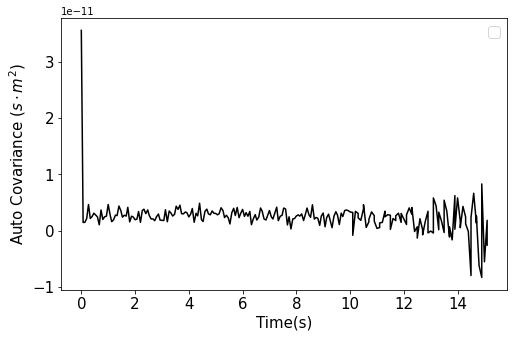

In [ ]:
# autocorrelation, (averaged over all trajectory)
autocorr = np.zeros(228)

autocorr[0] = np.average(v*v)

for i in range (227):
    autocorr[i+1] = np.average(v[:,i+1:]*v[:,:-i-1])



fig = plt.figure(1,figsize=(8,5))
plt.plot(t, autocorr,color='black')
#plt.ylim([-1e-10, 2e-10])     # Y축의 범위: [ymin, ymax]
# plt.axis([0, 5, 0, 20])  # X, Y축의 범위: [xmin, xmax, ymin, ymax]
#plt.xlim(0.5, 25)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time(s)',fontsize=15)
plt.ylabel('Auto Covariance ($s \cdot m^2$)',fontsize=15)
plt.savefig('auto_covar_1.06.png')
plt.show()
# this shows delta_correlation

In [ ]:
# csv 파일을 읽어서 DataFrame 객체로 만듦. 인덱스 컬럼은 point로 설정
df = pd.read_csv('1.06.csv')
df=df[:228]
df
x=np.array(df['x1'])
x=np.vstack([x,np.array(df['x2'])])
x=np.vstack([x,np.array(df['x3'])])
x=np.vstack([x,np.array(df['x4'])])
x=np.vstack([x,np.array(df['x5'])])
y=np.array(df['y1'])
y=np.vstack([y,np.array(df['y2'])])
y=np.vstack([y,np.array(df['y3'])])
y=np.vstack([y,np.array(df['y4'])])
y=np.vstack([y,np.array(df['y5'])])
# x
# y

In [ ]:
p = 10 
q = 171
num = q - p
for i,arr in enumerate(x) :
  if i == 0 :
    arr = arr[p:q]
    xt = np.array(arr)
  else :
    arr = arr[p:q]
    xt = np.vstack([xt,arr])

for i,arr in enumerate(y) :

  if i == 0 :
    arr = arr[p:q]
    yt = np.array(arr)
  else :
    arr = arr[p:q]
    yt = np.vstack([yt,arr])


xt = np.array(xt)
yt = np.array(yt)

In [ ]:
tt = t[p:q]

<function matplotlib.pyplot.show>

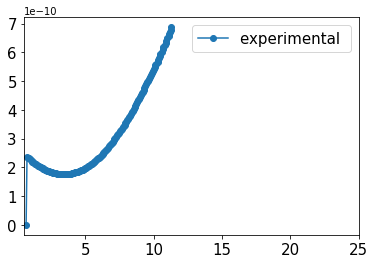

In [ ]:
# Mean Square Displacement
MSD = np.zeros(num)
# # MSD[0]=0
for tau in range (num-1):
    MSD[tau+1] = np.average((x[:,tau+1:]-x[:,:-tau-1])**2+(y[:,tau+1:]-x[:,:-tau-1])**2)
plt.plot(tt,MSD,'o-',label='experimental ')
plt.xlim(0.5, 25)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show

In [ ]:
t[50]

3.33

In [ ]:
from scipy.optimize import curve_fit

yy = np.zeros(num)
for tau in range (num-1):
    yy[tau+1] = np.average((xt[:,tau+1:]-xt[:,:-tau-1])**2+(yt[:,tau+1:]-yt[:,:-tau-1])**2)

def func(x,a,b,c) :
  return a*x**2+b*x+c


pp = 50
qq = 140
num = qq-pp
ttemp = t[pp]
ttt = tt[pp:qq]-ttemp
MSDt = MSD[pp:qq]
popt,pcov = curve_fit(func,ttt,MSDt)


popt

array([8.04654455e-12, 2.30174261e-12, 1.71931160e-10])

In [ ]:
from sklearn.metrics import r2_score
#MSDt = MSD
r2 = r2_score(MSDt,func(ttt,popt[0],popt[1],popt[2]))
r2

0.9998911376270724

In [ ]:
perr = np.sqrt(np.diag(pcov))
perr

array([4.48506439e-14, 3.33526194e-13, 5.37236640e-13])

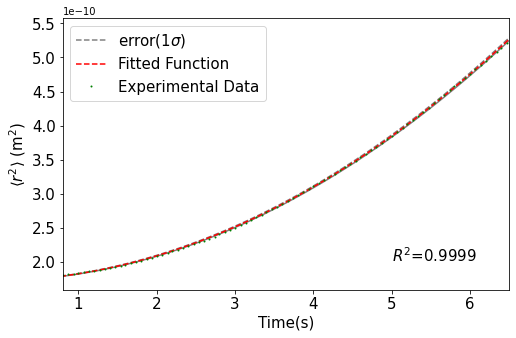

In [ ]:
xxx = np.linspace(ttt[0],ttt[-1],90)
xxxx = np.linspace(0,20,21)
x2 = np.linspace(0,15,171)

fig = plt.figure(1,figsize=(8,5))
plt.plot(xxx,func(xxx,popt[0],popt[1]+perr[1],popt[2]),'--',color='gray',ms=1,label='error(1$\sigma$)')
plt.plot(xxx,func(xxx,popt[0],popt[1]-perr[1],popt[2]),color='gray',ms=1)
plt.plot(xxx,func(xxx,popt[0],popt[1],popt[2]),'--',color='red',ms=1,label='Fitted Function')

plt.plot(ttt,MSDt,'o',color='green',ms=1,label='Experimental Data')

plt.xlim(0.8, 6.5)
plt.text(5.0,2e-10,f'$R^2$={r2:.4f}',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time(s)',fontsize=15)
plt.ylabel('$	\langle  r^2 	\\rangle $ (m$^2$)',fontsize=15)
#plt.ylim(1.25e-10,1.8e-10)
plt.savefig('MSDfitted_1.06.png')
plt.show()

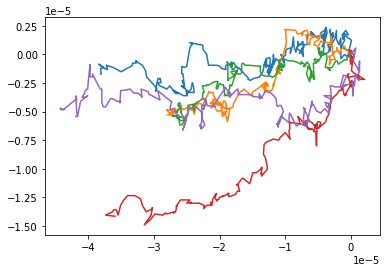

In [ ]:
plt.plot(df['x1'],df['y1'],df['x2'],df['y2'],df['x3'],df['y3'], df['x4'],df['y4'], df['x5'],df['y5'])

In [ ]:
m = popt[1]
m

2.301742612152749e-12

In [ ]:
err = perr[1]
err

3.3352619433308965e-13